# Project 3
# No show medical appointment data
* Part 1: Data Cleasing
* Here is the dataset observation

In [147]:
# load 'noshowappointments-kagglev2-may-2016.csv' dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

% matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print(df.shape)
print(df.columns)
print(df.head())

(110527, 14)
Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            

From above information, there are 110527 rows and 14 columns in this dataset.

Check the column names
* The format of 'ID'in 'PatientId' and 'AppointmentID' are not aligned.
* There are spelling mistakes for columes 'Hipertension' and 'Handcap'.
* The format of '-'in 'SMS_received' and 'No-show' are not aligned.
* They are revised as below. 

In [148]:
df.rename(columns={'PatientId': 'PatientID', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)
df.rename(columns=lambda x: x.replace("-", "_"), inplace=True)
# check the revised columns
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Check the data type of the columns

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* There are no missing data in 110527 rows. 
* But the type of 'PatientID' should be int and the type of 'ScheduleDay' and 'AppointmentDay' should be datetime objects. 
* They are revised as below.

In [150]:
df['PatientID'] = df['PatientID'].astype(int)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# check the revised data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null int32
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int32(1), int64(8), object(3)
memory usage: 11.4+ MB


Check duplicates

In [151]:
df.duplicated().sum()

0

No duplicates row in this dataset

Check invalid values

In [152]:
df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,-2.140311e+09,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,1.508486e+08,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-2.147484e+09,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.147484e+09,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.147484e+09,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-2.147484e+09,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.141274e+09,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Invalid values in 'Age': min is '-1'. Check the counts of invalid value. 

In [153]:
df[df['Age']== -1].count()['Age']

1

As there is only one row for this invalid Age value, remove it. 

In [154]:
df.loc[df['Age']== -1]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,-2147483648,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [155]:
df.drop(index=99832,inplace=True)
# check the revised dataset
df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,-2.140311e+09,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,1.508492e+08,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,-2.147484e+09,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.147484e+09,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.147484e+09,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-2.147484e+09,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.141274e+09,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Check invalid values for columns 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', and 'SMS_received'

In [156]:
# Print the unique values in the columns
check_columns = ['Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']

for col in check_columns:
    unique_value = df[col].unique()
    print('{}:{}'.format(col,unique_value))

Scholarship:[0 1]
Hypertension:[1 0]
Diabetes:[0 1]
Alcoholism:[0 1]
Handicap:[0 1 2 3 4]
SMS_received:[0 1]


No special issue for data in those columns. 
Let's go to 2nd part, data exploring

* Part 2: Data Exploring

Goal: What are the factors which can help us to predict if the patient will show up in the appointment?
      To find out the relationship between those factors (independent variables) and the show up performance(dependent variable)，I will investigate the variables: Gender, Age, Scholarship, Chronic Diseases, Handicap and SMS_received. 

* Overview for the no show appointment dataset

In [157]:
df['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

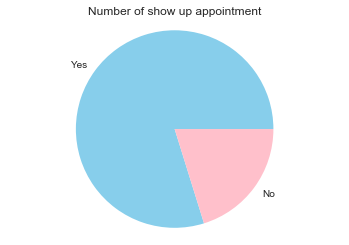

In [186]:
plt.pie([88207, 22319], labels = ['Yes', 'No'], colors = ['skyblue', 'pink'])
plt.axis('equal')
plt.title('Number of show up appointment');

* From above pie chart, we can see that the number of people show up in appointment is higher than no show. 
* Let's explore the dataset by these variables: Gender, Age, Scholarship and people with chroinc diseases such as hypertension, diabetes and alcoholism, handicap type and SMS_recived.

In [159]:
# 1.Gender counts
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

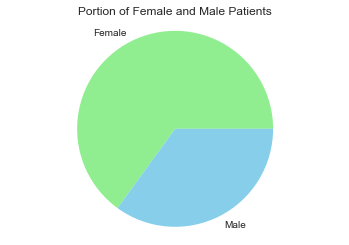

In [160]:
# Plot the graph of F and M portion
plt.pie([71839, 38687], labels = ['Female', 'Male'], colors = ['lightgreen', 'skyblue'])
plt.axis('equal')
plt.title('Portion of Female and Male Patients');

In [161]:
# Create dataframe to check the gender and no show counts
Gender_counts = df.groupby(['Gender','No_show']).count()['PatientID']
Gender_counts

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: PatientID, dtype: int64

In [162]:
# Calculate the proportion for show up rate by female and male
F_counts = Gender_counts['F','No']/df['Gender'].value_counts()['F']
M_counts = Gender_counts['M','No']/df['Gender'].value_counts()['M']

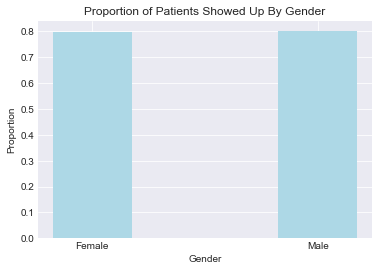

In [163]:
# Plot the graph for show up rate by gender
Proportions = [F_counts,M_counts]
plt.bar([1, 2], Proportions, width = 0.35, color='lightblue')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Female','Male'])
plt.title('Proportion of Patients Showed Up By Gender');

* From above graph, we can see that no big difference for the show up rate between female and male. 

In [164]:
# 2. Age 
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [165]:
# Set age groups
bin_edges = [0, 30, 60, 90, 115]
# Label each age group
bin_names = ['0-30', '30-59', '60-89', '>=90']
# Create new column of age groups
df['Age_group'] = pd.cut(df['Age'], bin_edges, labels=bin_names)
# Check column
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_group
0,-2147483648,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-89
1,-2147483648,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,30-59
2,-2147483648,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-89
3,-2147483648,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-30
4,-2147483648,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,30-59


In [170]:
# Create dataframe to check the age group and no show counts
Age_group_counts = df.groupby(['Age_group', 'No_show']).count()['PatientID']
Age_group_counts

Age_group  No_show
0-30       No         32241
           Yes         9851
30-59      No         36310
           Yes         8823
60-89      No         16510
           Yes         2944
>=90       No           246
           Yes           62
Name: PatientID, dtype: int64

In [171]:
# Calculate the show up rate by age groups
Below_thirty = Age_group_counts['0-30', 'No'] / df['Age_group'].value_counts()['0-30']
Thirty_to_fiftynine = Age_group_counts['30-59', 'No'] / df['Age_group'].value_counts()['30-59']
Fiftynine_to_nintey = Age_group_counts['60-89', 'No'] / df['Age_group'].value_counts()['60-89']
Ninety_and_above = Age_group_counts['>=90', 'No'] / df['Age_group'].value_counts()['>=90']

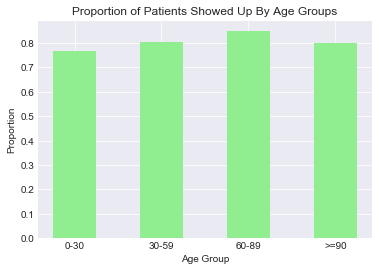

In [172]:
# Plot the graph of show up rate by age groups
Proportions = [Below_thirty, Thirty_to_fiftynine, Fiftynine_to_nintey, Ninety_and_above]
plt.bar([1, 2, 3, 4], Proportions, width = 0.5, color='lightgreen')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks([1, 2, 3, 4], ['0-30', '30-59', '60-89', '>=90'])
plt.title('Proportion of Patients Showed Up By Age Groups');

* From above graph, we can see people within age group 60-89 have the highest show up rate for the medical appointment. 
* And people within age group 0-30 have the lowest show up rate for the medical appointment. 

In [173]:
# 3. Scholarship 
# Create a dataframe to check the scholarship and no show counts
Scholarship_counts = df.groupby(['Scholarship','No_show']).count()['PatientID'] 
Scholarship_counts

Scholarship  No_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: PatientID, dtype: int64

In [174]:
# Calculate show up rate by scholarship
Without_scholarship = Scholarship_counts[0,'No']/df['Scholarship'].value_counts()[0]
With_scholarship= Scholarship_counts[1,'No']/df['Scholarship'].value_counts()[1]

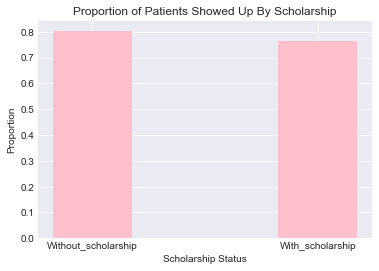

In [175]:
# Plot the graph of show up rate by scholarship
Proportions = [Without_scholarship, With_scholarship]
plt.bar([1, 2], Proportions, width=0.35, color='pink')
plt.xlabel('Scholarship Status')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Without_scholarship', 'With_scholarship'])
plt.title('Proportion of Patients Showed Up By Scholarship');

* From above graph, we can wee that the show up rate of people without scholarship is higher than people with scholarship.  

In [176]:
# 4. Chronic Diseases
# Create a dataframe to check the show up rate and chronic diseases counts
Hypertension_counts = df.groupby(['Hypertension','No_show']).count()['PatientID']
Diabetes_counts = df.groupby(['Diabetes','No_show']).count()['PatientID']
Alcoholism_counts = df.groupby(['Alcoholism','No_show']).count()['PatientID']
Hypertension_counts

Hypertension  No_show
0             No         70178
              Yes        18547
1             No         18029
              Yes         3772
Name: PatientID, dtype: int64

In [177]:
# Calculate show up rate by chronic diseases
Without_Hypertension = Hypertension_counts[0,'No']/df['Hypertension'].value_counts()[0]
With_Hypertension = Hypertension_counts[1,'No']/df['Hypertension'].value_counts()[1]

Without_Diabetes = Diabetes_counts[0,'No']/df['Diabetes'].value_counts()[0]
With_Diabetes = Diabetes_counts[1,'No']/df['Diabetes'].value_counts()[1]

Without_Alcoholism = Alcoholism_counts[0,'No']/df['Alcoholism'].value_counts()[0]
With_Alcoholism = Alcoholism_counts[1,'No']/df['Alcoholism'].value_counts()[1]

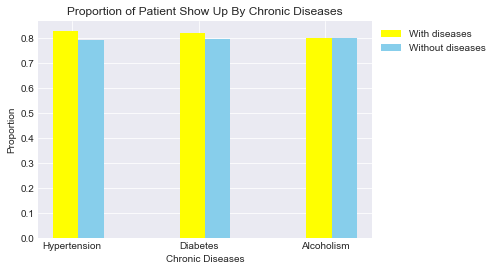

In [178]:
# Plot the graph of show up rate by chronic diseases
ind = np.array([1,2,3])
width = 0.2
                
yellow_bars = plt.bar(ind, [With_Hypertension, With_Diabetes, With_Alcoholism], width, color='yellow',label='With diseases')
blue_bars = plt.bar(ind + width, [Without_Hypertension, Without_Diabetes, Without_Alcoholism], width, color='skyblue',label='Without diseases')

plt.ylabel('Proportion')
plt.xlabel('Chronic Diseases')
plt.title('Proportion of Patient Show Up By Chronic Diseases')
locations = ind + width / 4
plt.xticks(locations, ['Hypertension','Diabetes','Alcoholism'])

plt.legend(bbox_to_anchor=(1,1))

* From above graph, we can see that the show up rate of people with hypertension is the highest and people with alcoholism is lowest. 

In [180]:
# 5.Handicap Type
# Create a dataframe to check show up rate and handicap type
Handicap_counts = df.groupby(['Handicap','No_show']).count()['PatientID']
Handicap_counts

Handicap  No_show
0         No         86373
          Yes        21912
1         No          1676
          Yes          366
2         No           146
          Yes           37
3         No            10
          Yes            3
4         No             2
          Yes            1
Name: PatientID, dtype: int64

In [181]:
# Calculate show up rate by handicap type 
Handicap0_noshow = Handicap_counts[0,'No']/df['Handicap'].value_counts()[0]
Handicap1_noshow = Handicap_counts[1,'No']/df['Handicap'].value_counts()[1]
Handicap2_noshow = Handicap_counts[2,'No']/df['Handicap'].value_counts()[2]
Handicap3_noshow = Handicap_counts[3,'No']/df['Handicap'].value_counts()[3]
Handicap4_noshow = Handicap_counts[4,'No']/df['Handicap'].value_counts()[4]

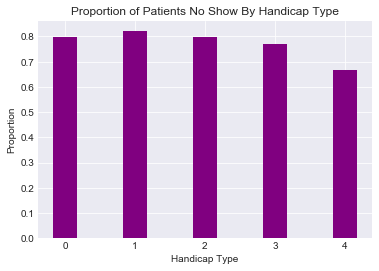

In [182]:
# Plot the graph of show up rate by handicap type
Proportions = [Handicap0_noshow, Handicap1_noshow, Handicap2_noshow, Handicap3_noshow, Handicap4_noshow]
plt.bar([1,2,3,4,5], Proportions, width=0.35, color='purple')
plt.xlabel('Handicap Type')
plt.ylabel('Proportion')
plt.xticks([1,2,3,4,5], [0,1,2,3,4])
plt.title('Proportion of Patients No Show By Handicap Type');

* From above graph, we can see that people with handicap 1 have the highest show up rate and the handicap 4 have the lowest rate.  

In [183]:
# 6.SMS received
# Create a dataframe to check show up rate and SMS received status
SMS_received_counts = df.groupby(['SMS_received','No_show']).count()['PatientID'] 
SMS_received_counts

SMS_received  No_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: PatientID, dtype: int64

In [184]:
# Calculate show up rate by SMS received
Without_SMS = SMS_received_counts[0,'No']/df['SMS_received'].value_counts()[0]
With_SMS = SMS_received_counts[1,'No']/df['SMS_received'].value_counts()[1]

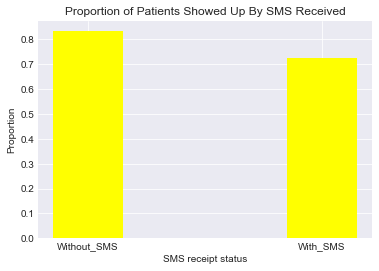

In [187]:
# Plot the graph of show up rate by SMS received
Proportions = [Without_SMS, With_SMS]
plt.bar([1, 2], Proportions, width=0.3, color='yellow')
plt.xlabel('SMS receipt status')
plt.ylabel('Proportion')
plt.xticks([1, 2], ['Without_SMS', 'With_SMS'])
plt.title('Proportion of Patients Showed Up By SMS Received');

* From above graph, we can wee that the show up rate of people without sms received is higher than people with sms received.

To conclude, by investigation of above variables: gender, age, scholarship, chronic diseases, handicap type and SMS received, I have below summary and insights. 

* Gender: It has no big impact for the no show rate. There is similar no show rate for female and male. 
* Age: The age group 60-89 has the highest show up rate for the medical appointment and people within age group 0-30 have the lowest rate.
* Scholarship: People without shcolarship have higher show up rate than other with scholarship.  
* Chronic diseases: People with hypertension have the highest show up rate and alcoholism have the lowest rate.
* Handicap: People with handicap type 1 have the highest show up rate and type 4 have the lowest. 
* SMS received: People who did not received appointment SMS have higher show up rate than that received SMS.

* The results shows that variables: age, chronic diseases, handicap and sms received have association with the show up rate. 
* For the results of age, it makes sense for people within 60-89 having the highest rate. As the health situation for this age group generally worser than peopel within 0-59. 
* For the results of scholarshipa and SMS received, it is surprised that people with scholarship and sms alert are less likely to show up. We can further do some research and data analysis to find out the reasons behind this observation. 